## Experiment No. 5 - Implement SOFM

### Self-Organizing Feature Map

A Self-organizing Map is a data visualization technique developed by Professor Teuvo Kohonen in the early 1980's. SOMs map multidimensional data onto lower dimensional subspaces where geometric relationships between points indicate their similarity. The reduction in dimensionality that SOMs provide allows people to visualize and interpret what would otherwise be, for all intents and purposes, indecipherable data. SOMs generate subspaces with an unsupervised learning neural network trained with a competitive learning algorithm.

## Algorithm

1. Loading libraries
2. Loading training and test set
3. Combining training and test set
4. Creating a visualization map
5. Heat Map
6. Distribution of neurons and outliers

### 1. Loading libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
import concurrent.futures
import time
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
from IPython.display import Image

### 2. Loading training and test set

In [3]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Combining training and test set to get over 70k samples

In [4]:
new_train = train.drop(columns=['label'])
new_test = test.drop(columns=['label'])
som_data = pd.concat([new_train, new_test], ignore_index=True).values
labels = pd.concat([train['label'], test['label']], ignore_index=True).values

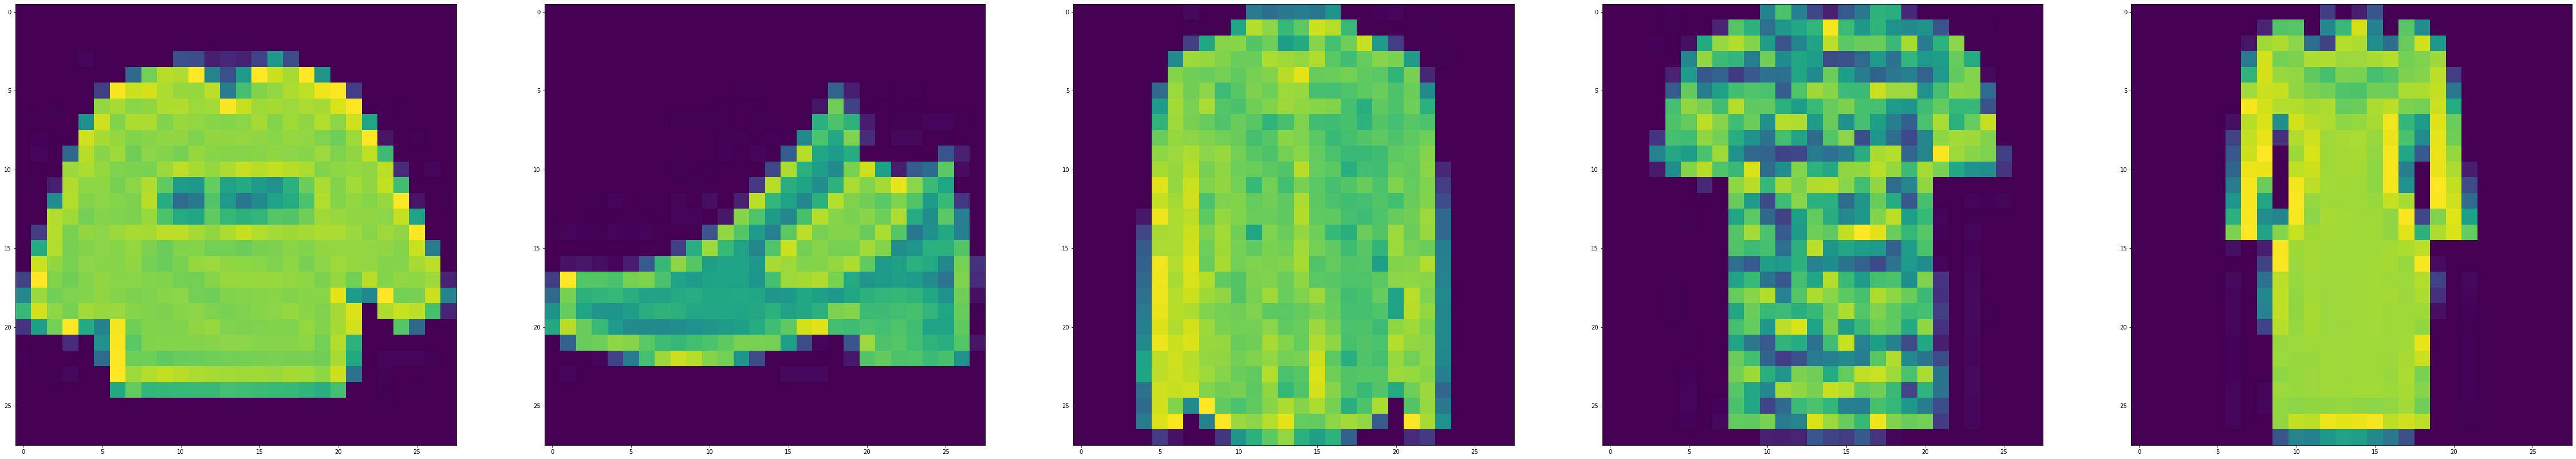

In [5]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(som_data[i].reshape(28, 28))
plt.show()

### 4. Creating a visualization map

In [6]:
#Initializing the map
start_time = time.time()
# The map will have x*y = 50*50 = 2500 features  
som = MiniSom(x=50,y=50,input_len=som_data.shape[1],sigma=0.5,learning_rate=0.4)
# There are two ways to train this data
# train_batch: Data is trained in batches
# train_random: Random samples of data are trained. Following line of code provides random weights as we are going to use train_random for training
som.random_weights_init(som_data)

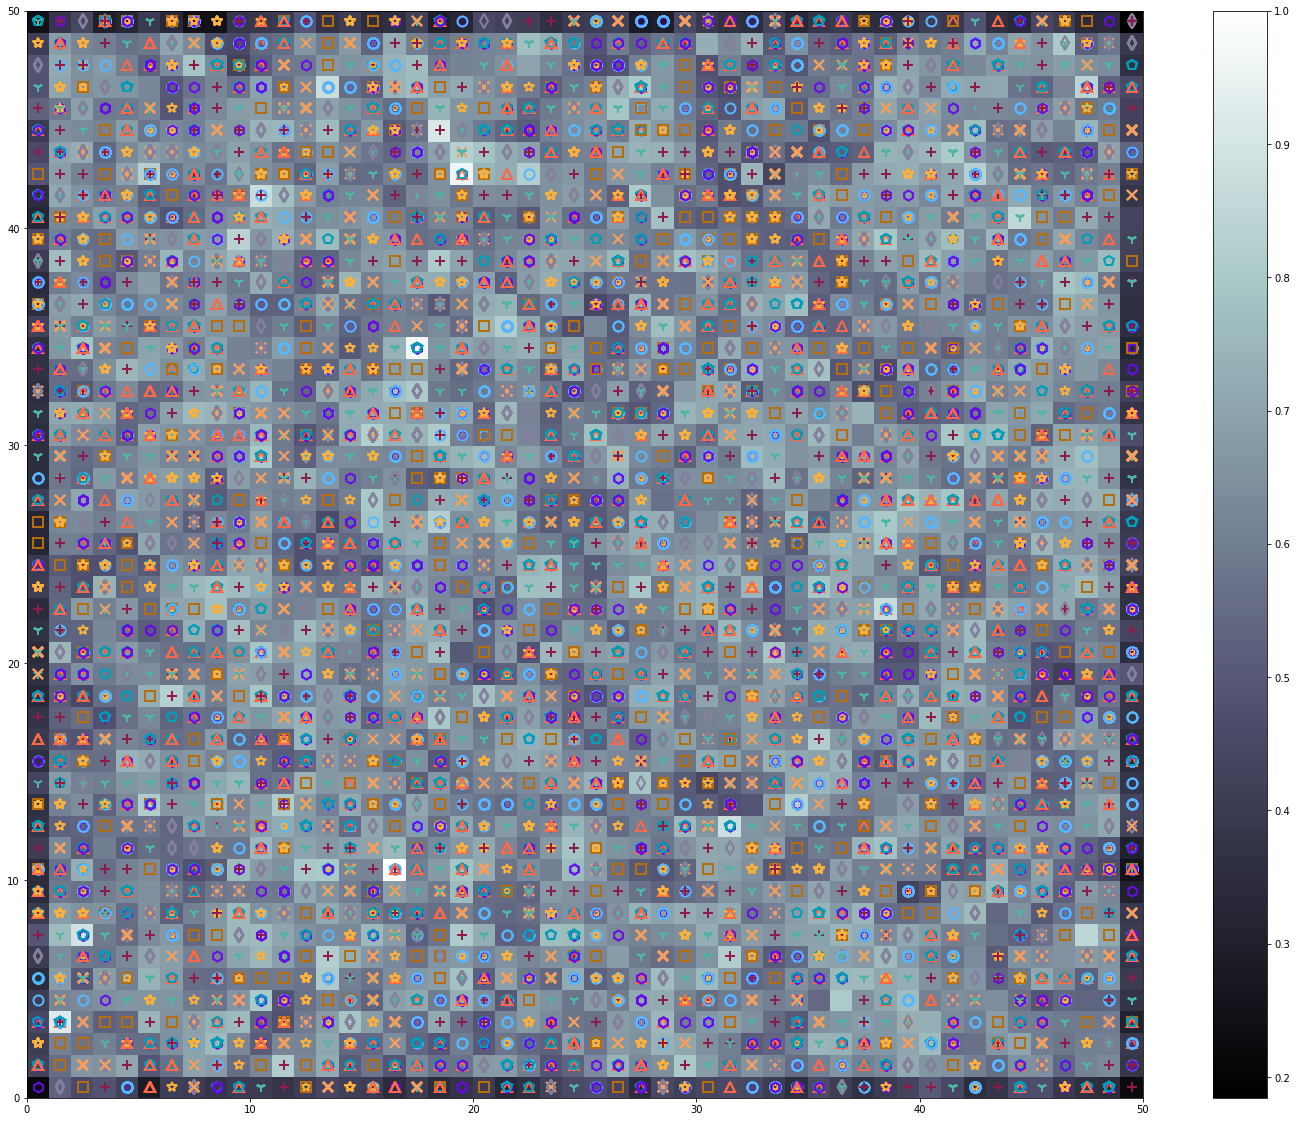

In [7]:
# Finally plotting the map
with concurrent.futures.ProcessPoolExecutor() as executor:
    rcParams['figure.figsize'] = 25, 20
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o','s','p','*','^','1','h','x','+','d']
    colors = ['#57B8FF','#B66D0D','#009FB7','#FBB13C','#FE6847','#4FB5A5','#670BE8','#F29F60','#8E1C4A','#85809B']
    for i,x in enumerate(som_data):
        w = som.winner(x)
        plot(w[0]+0.5,w[1]+0.5,markers[labels[i]],markeredgecolor=colors[labels[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
    savefig("map.png")
    show()
end_time = time.time() - start_time

In [8]:
print(int(end_time),"seconds taken to complete the task.")

3988 seconds taken to complete the task.


### 5. Heat Map

In [9]:
start_time = time.time()
# Returns a matrix where the element i,j is the number of time that the neuron i,j have been winner.
act_res = som.activation_response(som_data)
# Returns a dictionary wm where wm[(i,j)] is a list with all the patterns that have been mapped in the position i,j.
winner_map = som.win_map(som_data)
# Returns a dictionary wm where wm[(i,j)] is a dictionary that contains the number of samples from a given label that have been mapped in position i,j.
labelmap = som.labels_map(som_data,labels)
end_time = time.time() - start_time
print(int(end_time),"seconds taken to extract data from results.")

3753 seconds taken to extract data from results.


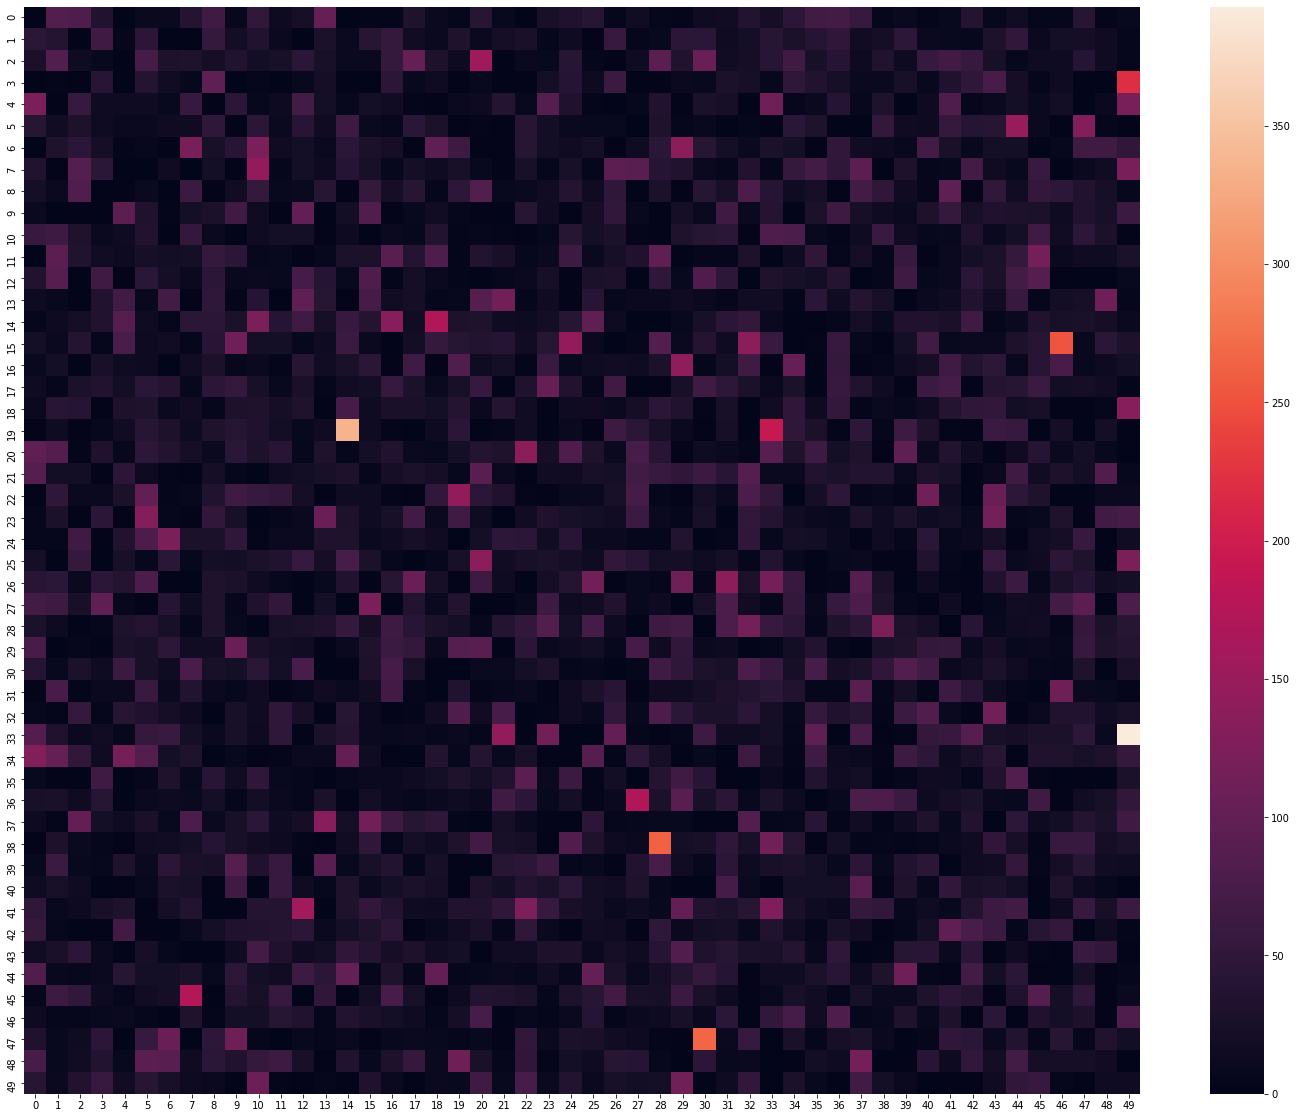

In [10]:
sns.heatmap(act_res)

### 6. Distribution of neurons and outliers

In [11]:
# Extracting outliers
q75, q25 = np.percentile(act_res.flatten(), [75 ,25])
iqr = q75 - q25
lower_fence = q25 - (1.5*iqr)
upper_fence = q75 + (1.5*iqr)
condition = (act_res < lower_fence) | (act_res > upper_fence)
outlier_neurons = np.extract(condition,act_res)

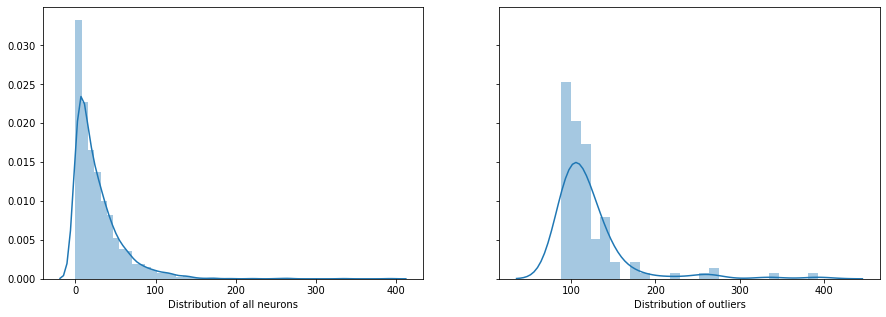

In [12]:
# Plotting the distribution of neurons and outliers
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
ax1.set(xlabel='Distribution of all neurons')
ax2.set(xlabel='Distribution of outliers')
sns.distplot(act_res.flatten(),ax=ax1)
sns.distplot(outlier_neurons,ax=ax2)
plt.close(2)
plt.close(3)

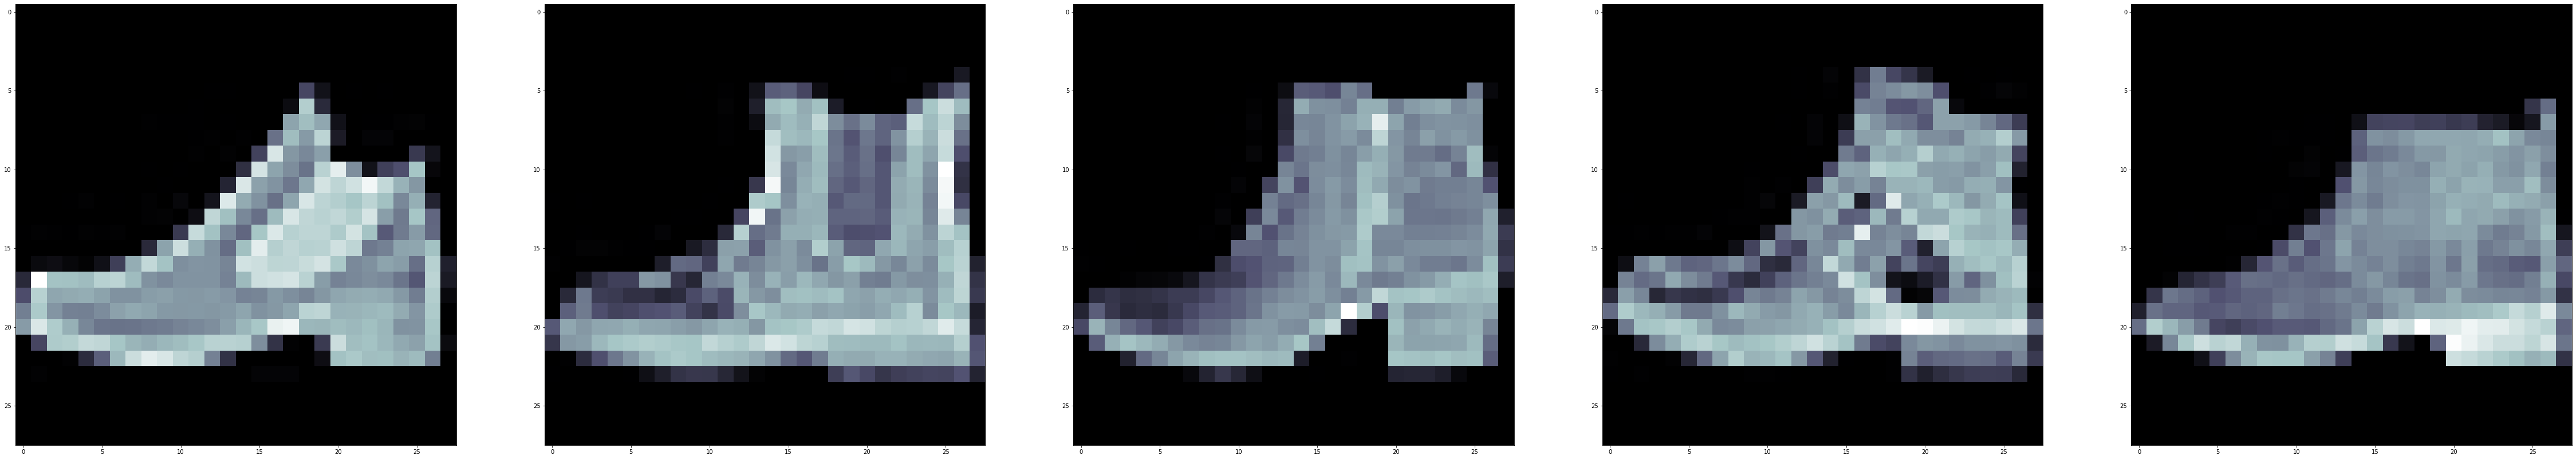

In [13]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(winner_map[list(winner_map)[1]][i].reshape(28, 28))
plt.show()

## Questions

**1. What are advantages of Kohonen SOFM algorithm?** 

Ans:- 
+ Data mapping is easily interpreted
+ Capable of organizing large, complex data sets

**2. Explain application of SOFM in character Recognition.**

It categorizes characters of different fonts into groups of the same letter (or general appearance).

It uses much longer vectors, that we would interpret in two dimensions, though the code only sees as individual rows.

At first, I had some trouble trying to grasp the architecture of a net like this; on the surface one would think that a second dimension had been added to the arrays, complicating the entire algorithm.  However, after more careful examination, there's still only the single dimension.

At first glance, one would expect input like this to entail two dimensions, vertical and horizontal ( 7 x 9 ):

<div align="center">..##...</div>
<div align="center">...#...</div>
<div align="center">...#...</div>
<div align="center">..#.#..</div>
<div align="center">..#.#..</div>
<div align="center">.#####.</div>
<div align="center">.#...#.</div>
<div align="center">.#...#.</div>
<div align="center">###.###</div>

The example input from above is actually only one row of data (63 elements):

..##......#......#.....#.#....#.#...#####..#...#..#...#.###.### 

The only part of this example that is more complicated is the structure and updating of the weights.  In last two code examples for self-organizing maps, the the weights were updated in a linear fashion.  In other words, after computing input, the winning node was updated, as were its neighbors to left and right (visualizing the nodes grouped in one straight line).  However, it entails updating the winning node, the neighbors to the left and right, and the neighbors above and below (visualizing the nodes grouped in two-dimensions).  The 5 x 5 structure used in the code would look like this:

0	1	2	3	4
5	6	7	8	9
10	11	12	13	14
15	16	17	18	19
20	21	22	23	24

Let's think of an example "winner", node 11.  Not only will its weights be updated, but also those of 10 and 12.  What's more, the weights of the three nodes above 11, which are 5, 6, and 7, will be updated, as well as those of the three nodes below 11, which are 15, 16 and 17.  This is what is referred to as a rectangular neighborhood.

After a preset number of iterations, the neighborhood (radius) is reduced to only the "winning" nodes.

Of course, we're not limited to only a rectangular neighborhood, a linear neighborhood is still a good approach.  A diamond shaped neighborhood, or circular, or almost any configuration could be used.  The end results will vary a little, and experimentation is the best way to see the differences.

**3. What is the principle of SOFM algorithm?**

Ans:- The principle fo SOFM algorithm is to visualize the whole data in one frame. Below sofm showing world poverty

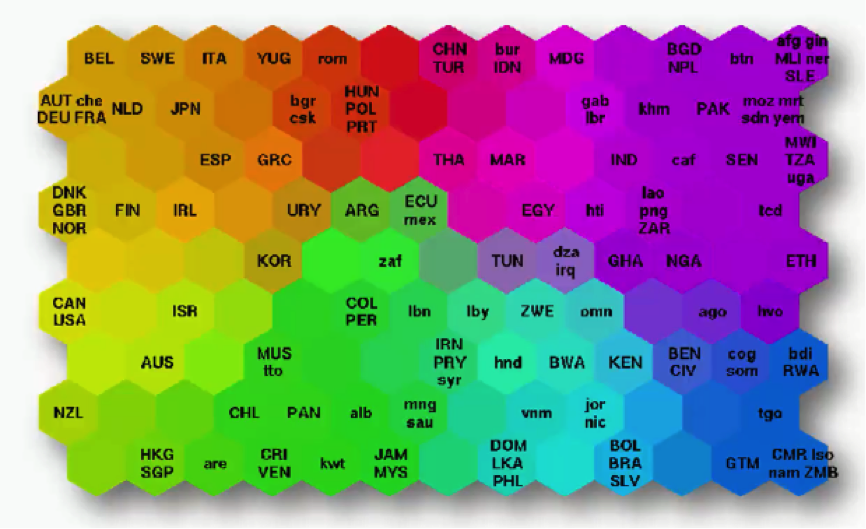

In [15]:
Image(filename="img/sofm.png")

### References

[1] https://www.kaggle.com/thebrownviking20/clustering-images-w-neural-network-bayesian-opt

[2] http://mnemstudio.org/neural-networks-som3.htm

[3] https://www.codeproject.com/Articles/16273/Self-Organizing-Feature-Maps-Kohonen-maps

[4] https://github.com/Kursula/Kohonen_SOM/blob/master/som.py

[5] https://towardsdatascience.com/kohonen-self-organizing-maps-a29040d688da

[6] https://towardsdatascience.com/self-organizing-map-layer-in-tensroflow-with-interactive-code-manual-back-prop-with-tf-580e0b60a1cc

[7] https://wonikjang.github.io/deeplearning_unsupervised_som/2017/06/30/som.html

Author Name:- Hemant Ghuge <br/>
LinkedIn:- https://www.linkedin.com/in/hemantghuge/ <br/>
GitHub:- https://github.com/HemantGorakshGhuge <br/>